<a href="https://colab.research.google.com/github/ecribbie/6912_PROJECT/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
!git clone https://github.com/ecribbie/6912_PROJECT.git
%cd ./6912_PROJECT/

Cloning into '6912_PROJECT'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 94 (delta 24), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (94/94), 3.94 MiB | 6.20 MiB/s, done.
Resolving deltas: 100% (24/24), done.
/content/6912_PROJECT


## Read data

In [2]:
data_original=pd.read_excel("default of credit card clients.xls")
data_original.head()
#do not touch this dataset, a copy is made into dat to use (it is the one that is cleaned below)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


## Clean data

In [3]:
dat=data_original.copy()
# Remove id column
dat.drop(dat.columns[0], axis=1, inplace=True)

# Dict of column names to definition
labels_to_variable = {}
for idx, column in enumerate(dat.columns):
    labels_to_variable[column]=dat.iloc[0, idx]
print(labels_to_variable)

# Remove the first row (labels)
dat = dat.iloc[1:]

# Reset index after removing the first row
dat.reset_index(drop=True, inplace=True)
dat.head()

{'X1': 'LIMIT_BAL', 'X2': 'SEX', 'X3': 'EDUCATION', 'X4': 'MARRIAGE', 'X5': 'AGE', 'X6': 'PAY_0', 'X7': 'PAY_2', 'X8': 'PAY_3', 'X9': 'PAY_4', 'X10': 'PAY_5', 'X11': 'PAY_6', 'X12': 'BILL_AMT1', 'X13': 'BILL_AMT2', 'X14': 'BILL_AMT3', 'X15': 'BILL_AMT4', 'X16': 'BILL_AMT5', 'X17': 'BILL_AMT6', 'X18': 'PAY_AMT1', 'X19': 'PAY_AMT2', 'X20': 'PAY_AMT3', 'X21': 'PAY_AMT4', 'X22': 'PAY_AMT5', 'X23': 'PAY_AMT6', 'Y': 'default payment next month'}


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Data splitting

In [4]:
# SPlit data into predictors and response
X = dat.iloc[:, :23]
Y = dat.iloc[:, 23]
Y=Y.astype(int)

# Splitting the data into training and testing
X_train_pre, X_test_pre, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_pre)
X_test = scaler.transform(X_test_pre)


# SMOTE and Undersampling

In [5]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

minority_class_count = np.sum(Y_train == 1)
majority_class_count = np.sum(Y_train == 0)

# Calculate desired number of samples for minority class to achieve 0.5 ratio
desired_minority_samples = int(minority_class_count * 1.2)
# Calculate desired number of samples for majority class to achieve 0.5 ratio
desired_majority_samples = int(desired_minority_samples * 2)

# Create SMOTE and RandomUnderSampler objects with specified sampling strategies
smote = SMOTE(sampling_strategy={1: desired_minority_samples})
undersample = RandomUnderSampler(sampling_strategy={0: desired_majority_samples})

# Creating a pipeline with SMOTE and undersampling
pipeline = Pipeline([
    ('smote', smote),
    ('undersample', undersample)
])

# Applying the pipeline to the training data only
X_train, Y_train = pipeline.fit_resample(X_train, Y_train)

In [6]:
from collections import Counter

# Counting unique values
Counter(Y_train)

Counter({0: 12774, 1: 6387})

# Logistic Regression

In [7]:
Y.astype(int)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Y, Length: 30000, dtype: int64

In [8]:
# Initialize the logistic regression model
log_reg = LogisticRegression(penalty='l1',C=.08,solver='liblinear')
log_reg = LogisticRegression(C=.004,penalty='elasticnet',solver='saga',l1_ratio=0.8)
# Fit the model on the training data
log_reg.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

Accuracy: 0.8126666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.89      4687
           1       0.61      0.39      0.48      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.66      0.68      6000
weighted avg       0.79      0.81      0.80      6000



In [9]:
from scipy.stats import norm
coef = log_reg.coef_.reshape(-1)  # Coefficients
std_err = np.std(X_train, 0) * np.sqrt((1 / (len(Y_train) - 1)) + (1 / len(Y_train)))  # Standard errors

# Compute z-scores and p-values
z_scores = coef / std_err
p_values = [2 * (1 - norm.cdf(np.abs(z))) for z in z_scores]

# Get column names of X_train
column_names = [f'feature_{i+1}' for i in range(X_train.shape[1])]

# Create DataFrame for summary
summary_df = pd.DataFrame({'Coefficient': coef, 'Standard Error': std_err, 'Z-score': z_scores, 'P-value': p_values},
                          index=column_names)

# Print summary
print(summary_df)

# Compute confidence intervals
conf_int = [(coef - 1.96 * std_err, coef + 1.96 * std_err) for coef, std_err in zip(coef, std_err)]

# Print confidence intervals
print("\nConfidence intervals:")
for i, (lower, upper) in enumerate(conf_int):
    print(f"Feature {i+1}: ({lower}, {upper})")

            Coefficient  Standard Error    Z-score       P-value
feature_1     -0.089212        0.010058  -8.869352  0.000000e+00
feature_2     -0.003358        0.010234  -0.328126  7.428167e-01
feature_3      0.000000        0.010085   0.000000  1.000000e+00
feature_4     -0.022497        0.010207  -2.203955  2.752754e-02
feature_5      0.025984        0.010219   2.542777  1.099753e-02
feature_6      0.574596        0.010844  52.986253  0.000000e+00
feature_7      0.114359        0.010745  10.642760  0.000000e+00
feature_8      0.080368        0.010718   7.498175  6.461498e-14
feature_9      0.026327        0.010780   2.442290  1.459442e-02
feature_10     0.000000        0.010824   0.000000  1.000000e+00
feature_11     0.000000        0.010796   0.000000  1.000000e+00
feature_12    -0.100618        0.010199  -9.865984  0.000000e+00
feature_13     0.000000        0.010194   0.000000  1.000000e+00
feature_14     0.000000        0.010200   0.000000  1.000000e+00
feature_15     0.000000  

# KNN Classification

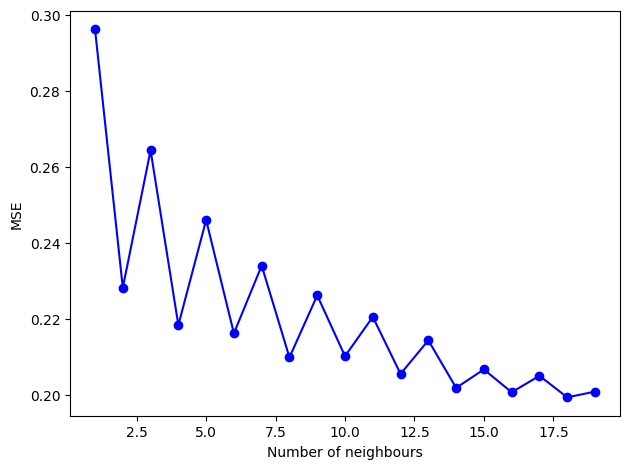

Accuracy using KNN: 0.7795

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4687
           1       0.50      0.47      0.48      1313

    accuracy                           0.78      6000
   macro avg       0.67      0.67      0.67      6000
weighted avg       0.78      0.78      0.78      6000



In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Elbow method to get the optimal number of Neighbours
mse = {}
for i in range(1, 20):
  knn_model = KNeighborsClassifier(n_neighbors=i)
  knn_model.fit(X_train, Y_train)
  Y_knn_preds = knn_model.predict(X_test)
  mse[i] = mean_squared_error(Y_test, Y_knn_preds)
  # rmse[i] = sqrt(mse)
  # print("n = " + str(i) + " : " + str(mse[i]))


# Plot the figure
fig = plt.figure()
plt.plot(mse.keys(), mse.values(), '-bo')
plt.xlabel('Number of neighbours')
plt.ylabel('MSE')
plt.tight_layout()
plt.show()

# Initiate a KNN Classifier model with 3 neighbours
k = 11
knn_model = KNeighborsClassifier(n_neighbors=k)

# Train the KNN model
knn_model.fit(X_train, Y_train)

# Make predictions using the test data
Y_knn_preds = knn_model.predict(X_test)

# Evaluate the Kmeans model
accuracy = accuracy_score(Y_test, Y_knn_preds)
print("Accuracy using KNN:", accuracy)

# Print classification report
print("\nClassification Report for KNN:")
print(classification_report(Y_test, Y_knn_preds))

## Decision tree

In [11]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree, export_graphviz, export_text
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn.metrics import roc_curve, auc, average_precision_score
import math

[Text(0.6, 0.9, 'X6 <= 0.903\nentropy = 0.918\nsamples = 19161\nvalue = [12774, 6387]'),
 Text(0.4, 0.7, 'X7 <= 0.185\nentropy = 0.82\nsamples = 16439\nvalue = [12236, 4203]'),
 Text(0.2, 0.5, 'X19 <= -0.179\nentropy = 0.769\nsamples = 14863\nvalue = [11519, 3344]'),
 Text(0.1, 0.3, 'X21 <= -0.245\nentropy = 0.875\nsamples = 5936\nvalue = [4184, 1752]'),
 Text(0.05, 0.1, 'entropy = 0.918\nsamples = 3798\nvalue = [2535, 1263]'),
 Text(0.15, 0.1, 'entropy = 0.776\nsamples = 2138\nvalue = [1649, 489]'),
 Text(0.3, 0.3, 'X9 <= 0.192\nentropy = 0.676\nsamples = 8927\nvalue = [7335, 1592]'),
 Text(0.25, 0.1, 'entropy = 0.644\nsamples = 8399\nvalue = [7022, 1377]'),
 Text(0.35, 0.1, 'entropy = 0.975\nsamples = 528\nvalue = [313, 215]'),
 Text(0.6, 0.5, 'X11 <= 0.651\nentropy = 0.994\nsamples = 1576\nvalue = [717, 859]'),
 Text(0.5, 0.3, 'X23 <= 0.106\nentropy = 1.0\nsamples = 1110\nvalue = [550, 560]'),
 Text(0.45, 0.1, 'entropy = 0.998\nsamples = 1031\nvalue = [491, 540]'),
 Text(0.55, 0.1, 

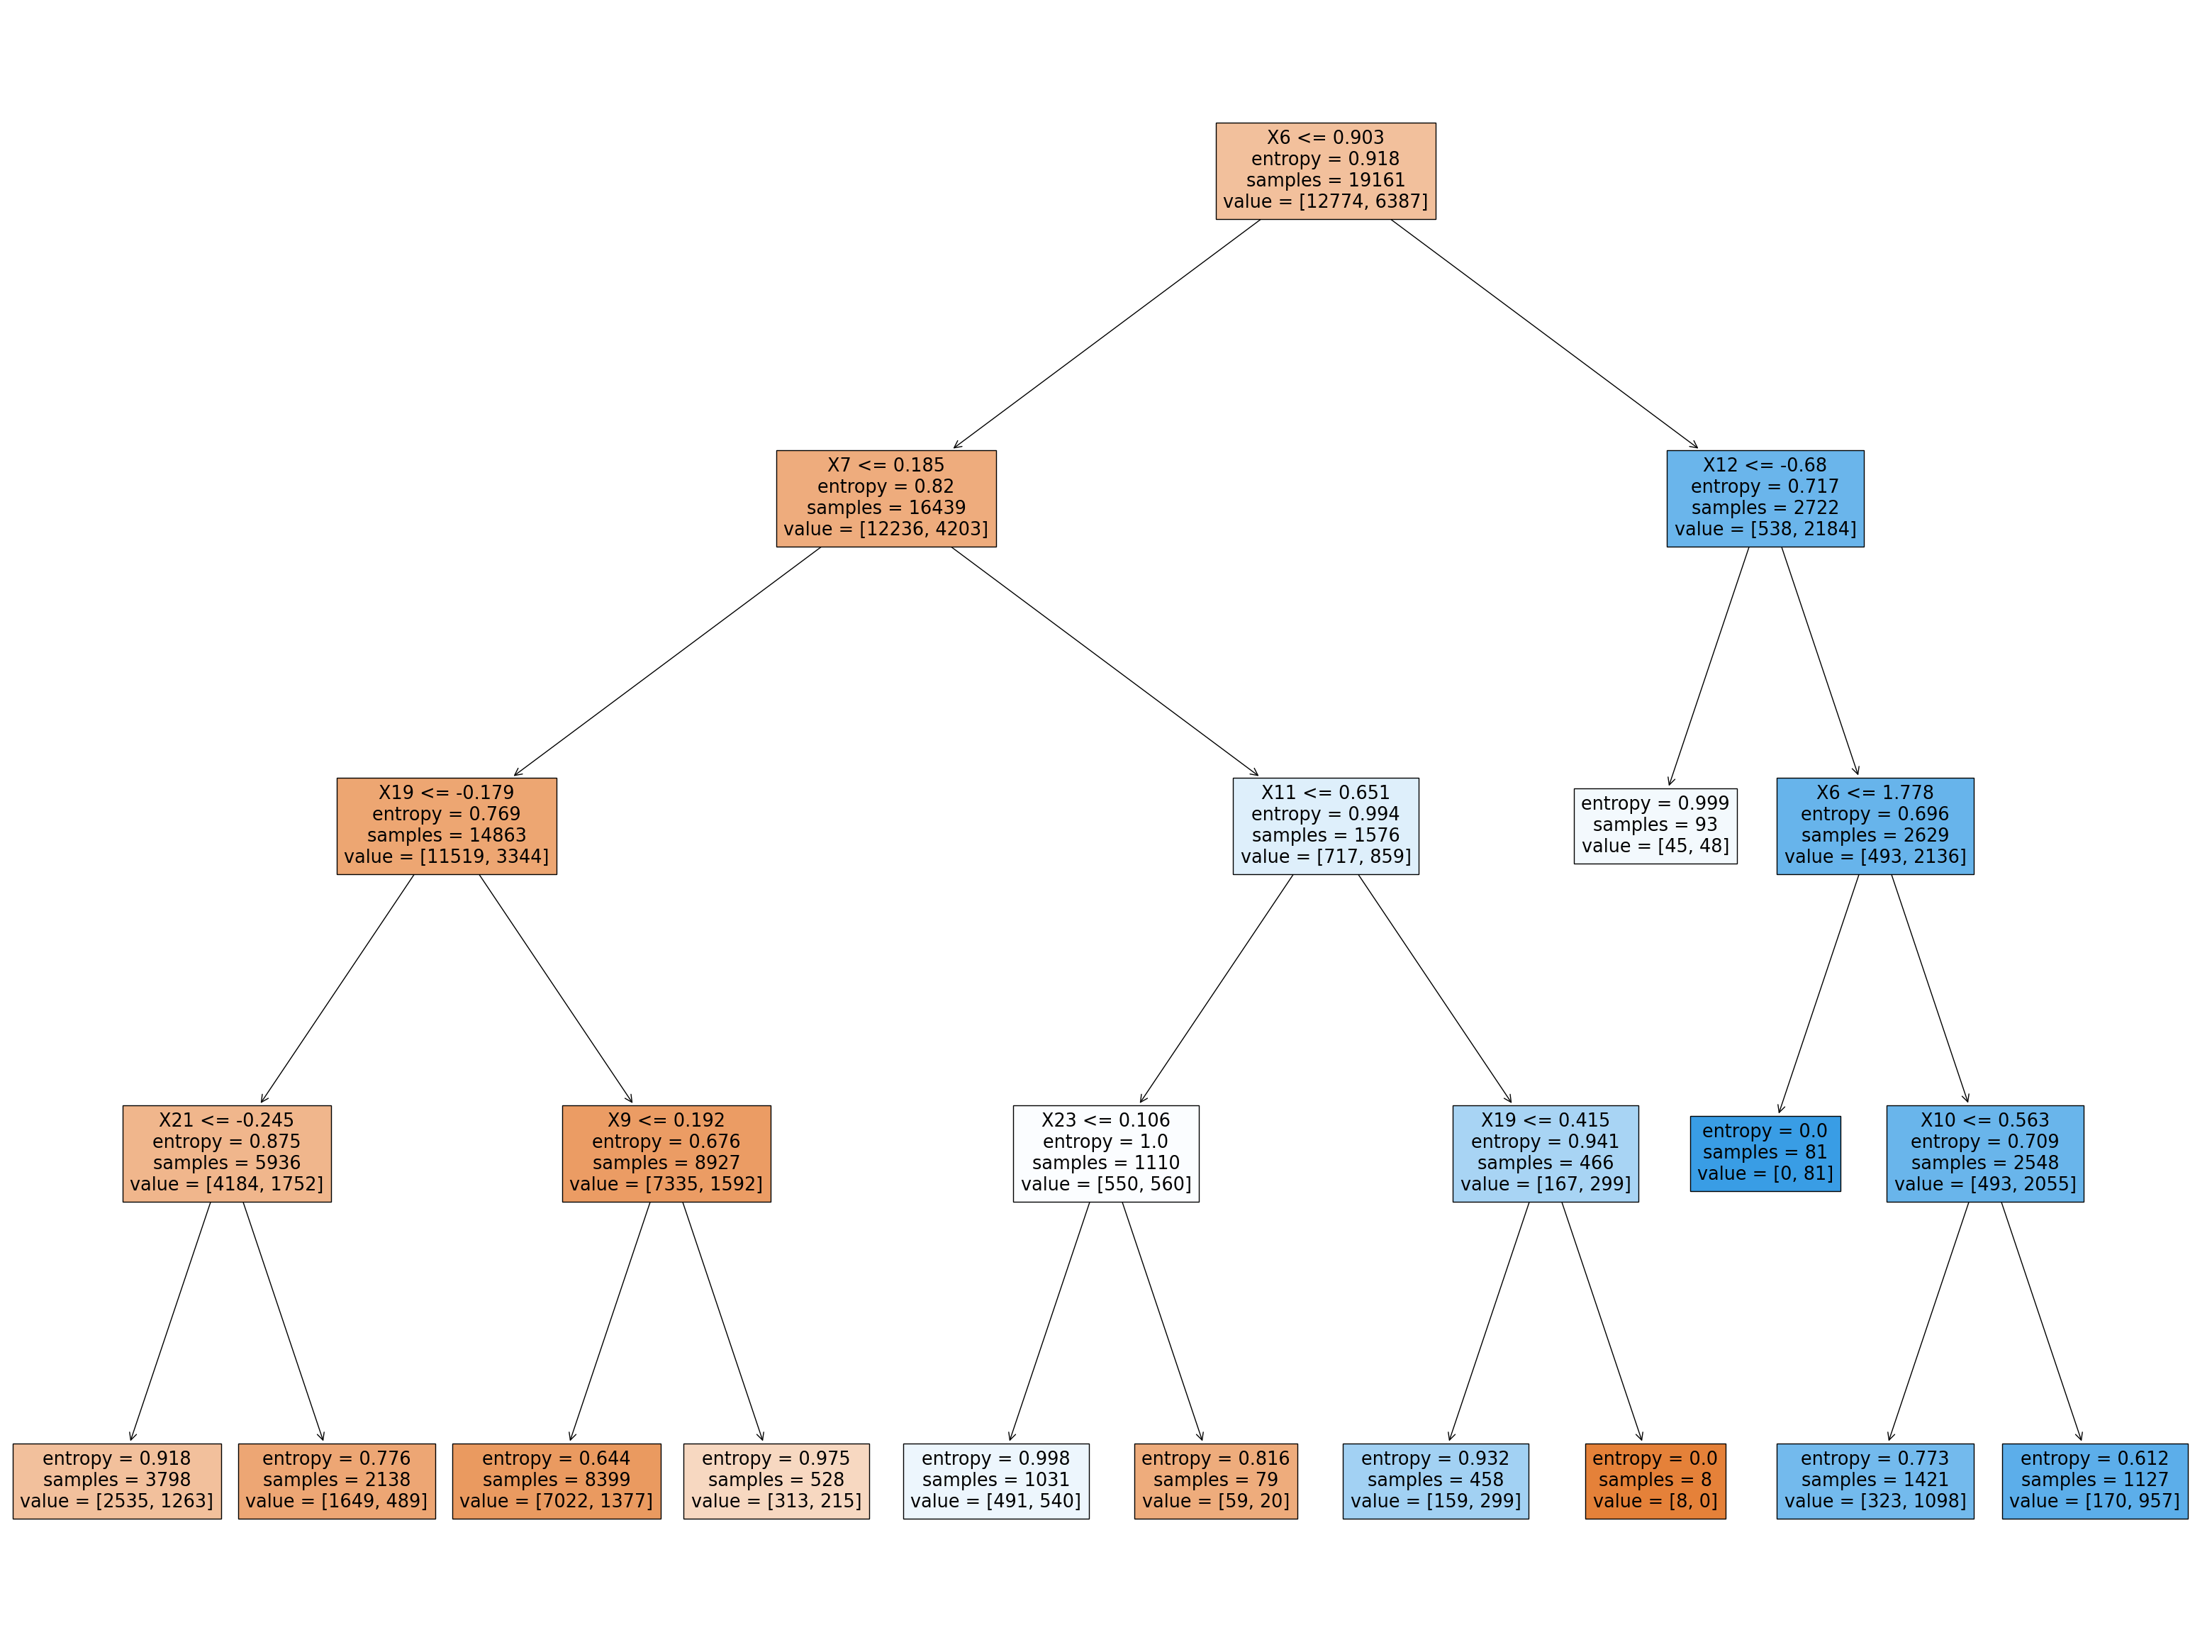

In [12]:
X_train_pre.columns
pred = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=200, random_state=0)
pred.fit(X_train, Y_train)
fig, ax = plt.subplots(figsize=(40, 30))
plot_tree(pred, filled=True, feature_names=list(X_train_pre.columns), proportion=False)

In [13]:
def test_decision_tree(X_train, y_train, X_test, Y_test, max_depth, min_samples_split):
    #Trained Decision Tree model
    pred = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_split=min_samples_split, random_state=0)
    pred.fit(X_train, Y_train)

    #Predicted test set
    Y_pred_test = pred.predict(X_test)
    mse_test = mean_squared_error(Y_pred_test, Y_test)
    rmse_test = math.sqrt(mse_test)
    print(f"RMSE for test set with max_depth={max_depth} and min_samples_split={min_samples_split}: {rmse_test}")

In [14]:
test_decision_tree(X_train, Y_train, X_test, Y_test, max_depth=2, min_samples_split=200)
test_decision_tree(X_train, Y_train, X_test, Y_test, max_depth=4, min_samples_split=200)
test_decision_tree(X_train, Y_train, X_test, Y_test, max_depth=3, min_samples_split=100)
test_decision_tree(X_train, Y_train, X_test, Y_test, max_depth=3, min_samples_split=500)

RMSE for test set with max_depth=2 and min_samples_split=200: 0.44422216663887154
RMSE for test set with max_depth=4 and min_samples_split=200: 0.4412104562073146
RMSE for test set with max_depth=3 and min_samples_split=100: 0.44422216663887154
RMSE for test set with max_depth=3 and min_samples_split=500: 0.44422216663887154


In [17]:
print("Accuracy:", accuracy_score(Y_test, pred.predict(X_test)))

# Print classification report
print("\nClassification Report:")
print(classification_report(Y_test, pred.predict(X_test)))

Accuracy: 0.8053333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4687
           1       0.57      0.46      0.51      1313

    accuracy                           0.81      6000
   macro avg       0.71      0.68      0.69      6000
weighted avg       0.79      0.81      0.80      6000



# Random forrests

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_classifier = RandomForestClassifier(n_estimators=100)

# Train the classifier on the training data
rf_classifier.fit(X_train, Y_train)

# Make predictions on the testing data
predictions = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)
# Print classification report
print("\nClassification Report:")
print(classification_report(Y_test, predictions))

Accuracy: 0.8063333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4687
           1       0.57      0.46      0.51      1313

    accuracy                           0.81      6000
   macro avg       0.71      0.68      0.69      6000
weighted avg       0.79      0.81      0.80      6000



## ROC

AUC random predictions = 0.5
AUC predictions from logistic regression model = 0.7289371795494692
AUC predictions from KNN model = 0.7297362492974118
AUC predictions from Decision Tree model = 0.7462400660640156


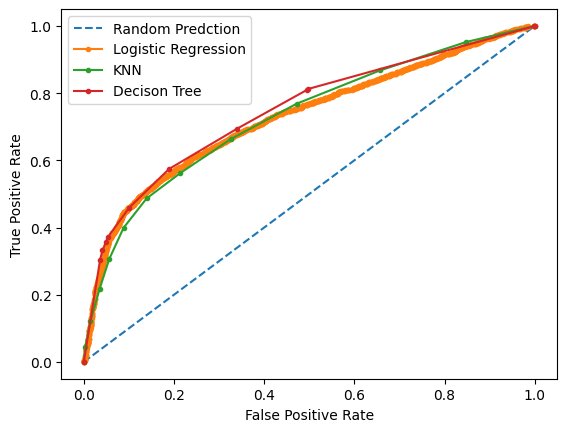

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

# AUC line for Random prediction
ns_prob=[0 for _ in range(len(Y_test))]
ns_fpr,ns_tpr,_=roc_curve(Y_test,ns_prob)

ns_auc=roc_auc_score(Y_test, ns_prob)

# AUC for Logistic regression
lr_prob=log_reg.predict_proba(X_test)
lr_prob=lr_prob[:, 1]
lr_auc=roc_auc_score(Y_test,lr_prob)

lr_fpr,lr_tpr,_=roc_curve(Y_test,lr_prob)

# AUC for KNN
knn_prob=knn_model.predict_proba(X_test)
knn_prob=knn_prob[:, 1]
knn_fpr,knn_tpr,_=roc_curve(Y_test,knn_prob)

knn_auc=roc_auc_score(Y_test,knn_prob)


# AUC for Decision Tree
pred_p=pred.predict_proba(X_test)
pred_p=pred_p[:, 1]
dt_fpr,dt_tpr,_=roc_curve(Y_test,pred_p)

dt_auc=roc_auc_score(Y_test,pred_p)



# Print the AUC for the models
print("AUC random predictions =", ns_auc)
print("AUC predictions from logistic regression model =", lr_auc)
print("AUC predictions from KNN model =", knn_auc)
print("AUC predictions from Decision Tree model =", dt_auc)



# Plot the ROC curves
plt.plot(ns_fpr,ns_tpr,linestyle='--',label='Random Predction')
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression')
plt.plot(knn_fpr,knn_tpr,marker='.',label='KNN')
plt.plot(dt_fpr,dt_tpr,marker='.',label='Decison Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()